In [1]:
import os
os.chdir('../source')
from ARIA import ARIA
from Image import Image
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/home/csimmons/Research/playground/Main/SLC_Processed/LA_SPM'

In [2]:
ref = Image(data_dir+'/coh_VV_31Dec2019_23Feb2020_common_grid.tif')
ref.read()
sec = Image(data_dir+'/coh_VV_30Mar2020_29Apr2020_common_grid.tif')
sec.read()

geographic_bounds = [-118.7, -117.7, 33.5, 34.2]
aria = ARIA(geographic_bounds)

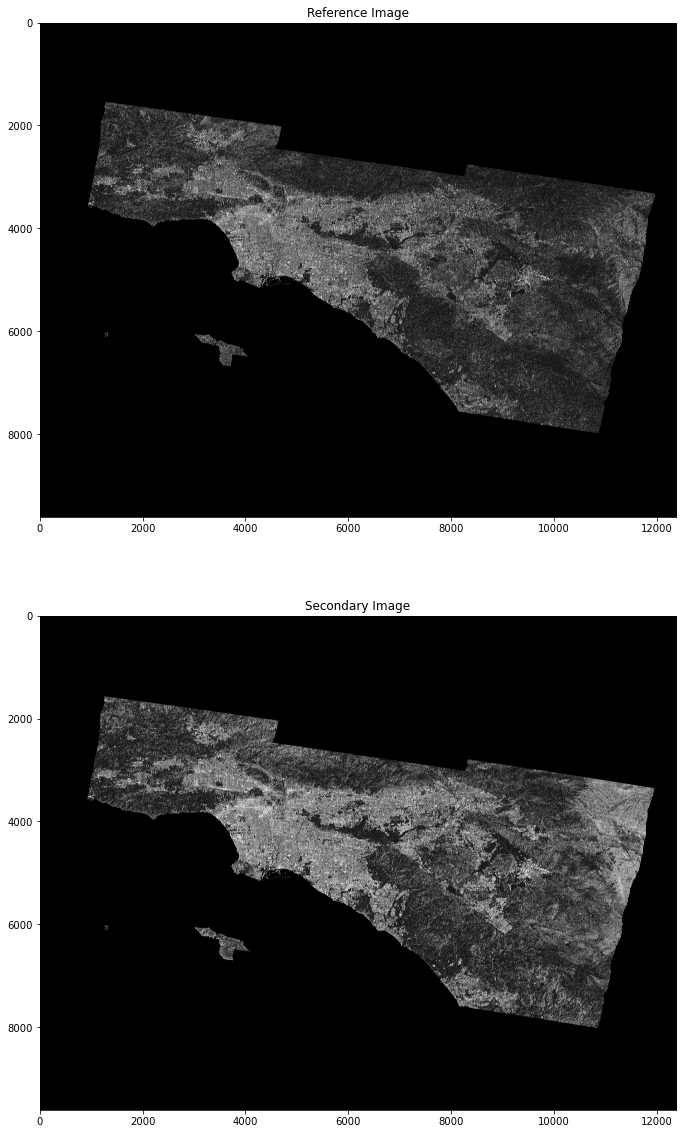

In [3]:
fig, ax = plt.subplots(figsize=(20,20), nrows=2)
ax[0].imshow(ref.band, cmap='gray')
ax[0].set_title('Reference Image')
ax[1].imshow(sec.band, cmap='gray')
ax[1].set_title('Secondary Image')
plt.show()

In [3]:
save_data = aria.process_ARIA(ref, [sec], t=0.2, map_type=aria.simple_map, file_prefix='LASPM')

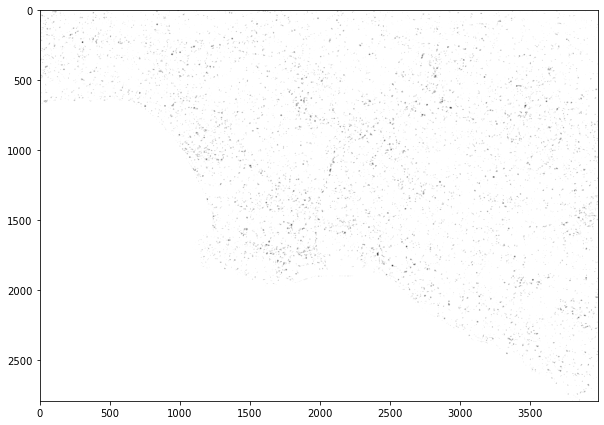

In [4]:
for save in save_data:
    band = save.map
    plt.figure(figsize=(10,10))
    plt.imshow(band, cmap='binary')
    plt.show()